# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.03691,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.00000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.00000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [6]:
# load client_df 
client_df = pd.read_csv('client_data.csv')

# extract columns that showed response to churn
client_df_extract = client_df.loc[:, ['id', 'channel_sales', 'has_gas', 'nb_prod_act', 'num_years_antig', 'origin_up', 'pow_max', 'churn']]

client_df_extract.head()

,id,channel_sales,has_gas,nb_prod_act,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,t,2,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
# merge the extracted columns from client_df with the feature engineered from price
final_data = pd.merge(diff, client_df_extract)
final_data.head(3)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,has_gas,nb_prod_act,num_years_antig,origin_up,pow_max,churn
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,foosdfpfkusacimwkcsosbicdxkicaua,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,MISSING,f,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,usilxuppasemubllopkaafesmlibmsdf,f,2,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0


## Data preparation for machine learning algorithm

In [8]:
# ger dummies for every categorical column apart from customer id
final_data = pd.get_dummies(final_data, columns=['has_gas', 'channel_sales', 'origin_up'], drop_first=True)

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   offpeak_diff_dec_january_energy                 14606 non-null  float64
 2   offpeak_diff_dec_january_power                  14606 non-null  float64
 3   nb_prod_act                                     14606 non-null  int64  
 4   num_years_antig                                 14606 non-null  int64  
 5   pow_max                                         14606 non-null  float64
 6   churn                                           14606 non-null  int64  
 7   has_gas_t                                       14606 non-null  uint8  
 8   channel_sales_epumfxlbckeskwekxbiuasklxalciiuu  14606 non-null  uint8  
 9   channel_sales_ewpakwlliwisiwduibdlfmalx

In [10]:
# import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder
le = LabelEncoder()

# use label encoder to tansform custommer id
final_data['id'] = le.fit_transform(final_data['id'])

# Model selection and training

In [11]:
# import train test split 
from sklearn.model_selection import train_test_split

# split the data to features and target variable
X = final_data.drop(['churn', 'id'], axis = 1)
y = final_data['churn']

In [12]:
# split the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# import Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# instantiate random forest classifier
rfc = RandomForestClassifier()

In [15]:
# train the model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
#predict with the model
rfc_pred = rfc.predict(X_test)

In [17]:
# import and apply evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix

# print evaluation report
print(classification_report(rfc_pred, y_test))
print('\n')
print(confusion_matrix(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3556
           1       0.07      0.26      0.11        96

    accuracy                           0.89      3652
   macro avg       0.53      0.59      0.53      3652
weighted avg       0.95      0.89      0.92      3652



[[3240  316]
 [  71   25]]


Comments: Too many false  positives

In [35]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

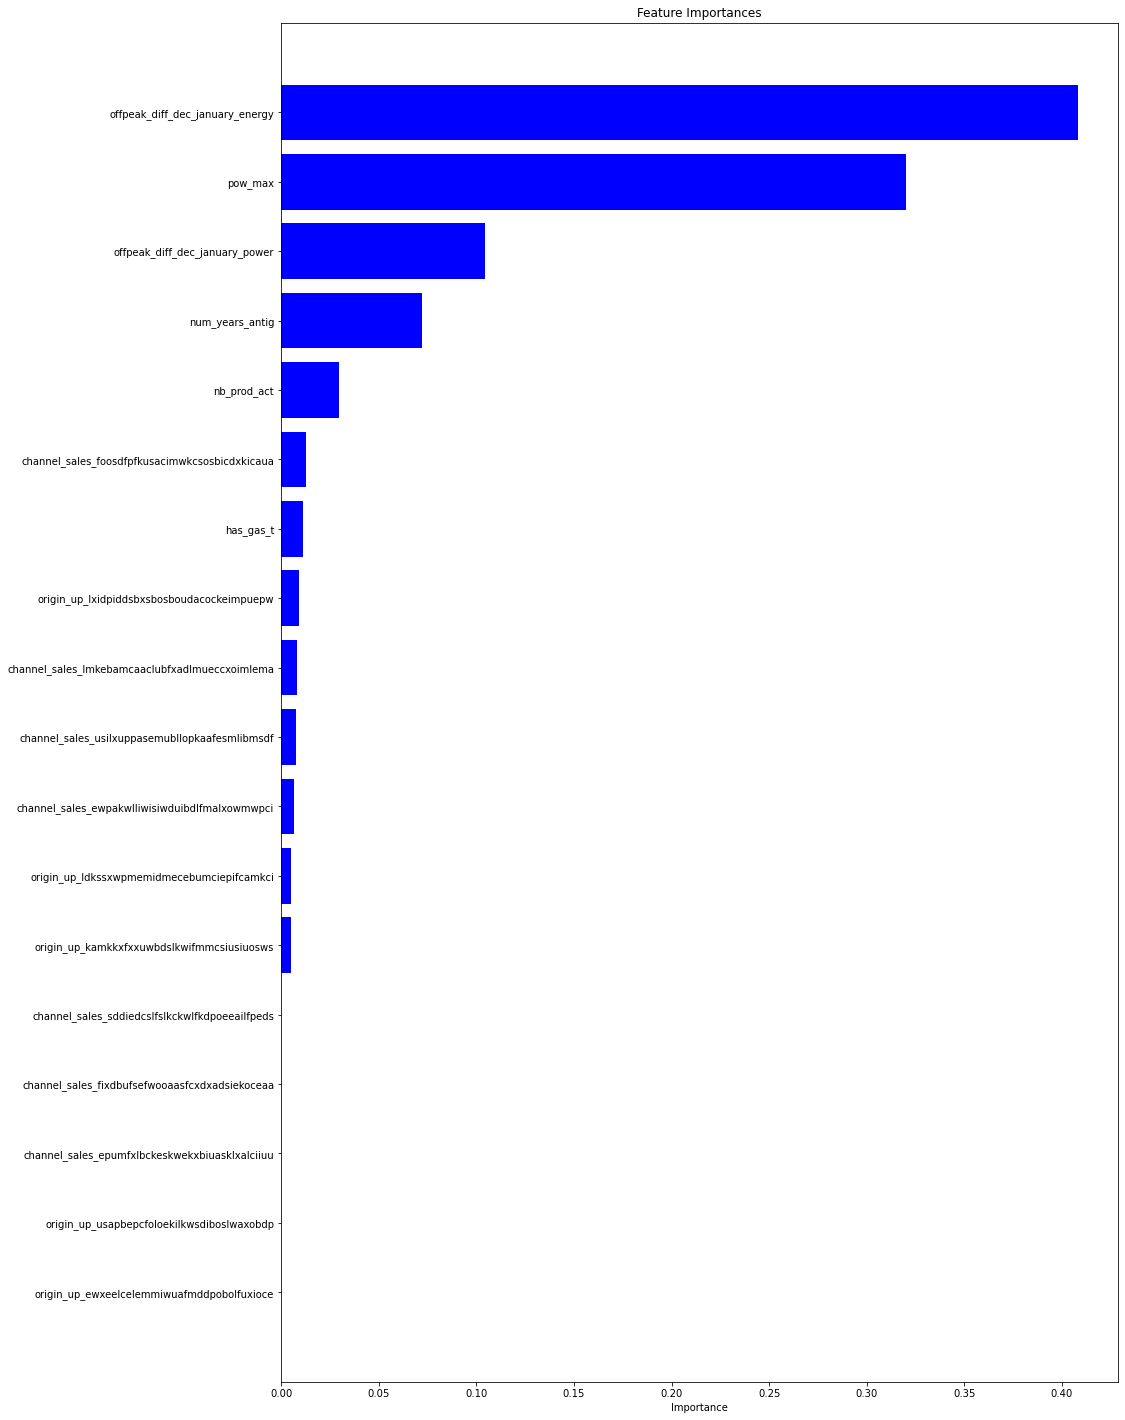

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()